# 1. Project Summary

In this notebook, we aim to analyze data from an aviation data set from National Transport and Safety Board.

This data contain accident information from 1962 - 2023.



# 2.Business Understanding 

We will use the above dataset to determine for our company which is the safest airplane to purchase.

The data set contains several columns but we will focus on those that relate to airplane safety.



# 3. Data Understanding -Data Source

This data source was sourced from NTSB Aviation Accident Database and involves data concerning accidents of different aircraft makes between 1962- 2023. For this project despite the many columns of data,we will use the total fatal injuries column and engine types column to suggest the best aircraft make. 


# 4. Business Objectives

This project aims at helping my company make a decision on which aircraft have the lowest risk to purchase and operate by giving clear, actionable recommendations 

# 5. Success Criteria

We will only suggest aircrafts with the lowest fatal injuries and most effective engine type. 

# 6. Data Preparation



## 6.1 Data Loading

In [1]:
#Loading Data and importing necessary libraries
# import pandas and matplotlib

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Let us read our data set

aviation_data = pd.read_csv('Aviation_Data.csv')

c:\Users\Moringa School\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
# let us confirm that our data has been read by looking at the first 5 rows
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## 6.2 Data Exploration





In [8]:
# Looking at our columns
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
# Let us explore our data set generally
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [10]:
## Selecting the columns we will need for our analysis

selected_columns = ['Total.Fatal.Injuries', 'Make', 'Engine.Type']


In [11]:
# Lets us restrict our data set to the pre-defined selected columns
aviation_data = aviation_data[selected_columns]

In [12]:
# Let us confirm that our data set now contains information of only the 2 columns
# We will read the first 5 rows.

aviation_data.head()

,Total.Fatal.Injuries,Make,Engine.Type
0,2.0,Stinson,Reciprocating
1,4.0,Piper,Reciprocating
2,3.0,Cessna,Reciprocating
3,2.0,Rockwell,Reciprocating
4,1.0,Cessna,NaN


## 6.3 Data Cleaning 

Now that we have identified the columns we will be using, let us start on Data Preparation by looking for duplicates and missing values (and filling them)

In [13]:
# Let us start by looking for duplicates 

aviation_data.duplicated().sum()     #There is 79134 duplicates noted. 

# Let us remove duplicates and save using inplace = True
aviation_data.drop_duplicates(inplace = True)

# Let us confirm that duplicates have been dropped
aviation_data.duplicated().sum()

0

All Duplicates have been dropped

In [14]:
# Let us now look for missing values and see how to fill them

aviation_data.isna().sum()  # There are several missing values in each category

Total.Fatal.Injuries    1677
Make                      12
Engine.Type             1649
dtype: int64

In [15]:
# Our categories are both numerical (Total.Fatal.Injuries) and Non-numerical (Injury Severity and Make)

# let us start eith Total Fatal Injuries.
# we will first get the measures of central tendency to decide what to fill them with

aviation_data['Total.Fatal.Injuries'].agg(['mean', 'median'])

mean      2.326657
median    0.000000
Name: Total.Fatal.Injuries, dtype: float64

In [16]:
# The mean of our Total Fatal Injuries is 2.3
# We will fill the missing values in this category with this mean

aviation_data['Total.Fatal.Injuries'].fillna(aviation_data['Total.Fatal.Injuries'].mean(), inplace = True)

In [17]:
# Let us confirm that our missing values in Total Fatal Injuries are done

aviation_data['Total.Fatal.Injuries'].isna().sum()

0

In [18]:
# Now let us consider dropping our non numerical columns instead of filling with mode as this might affect overall output.

aviation_data.dropna(inplace = True)

In [19]:
# Let us confirm that all our misisng values in the non numerical columns are dropped.

aviation_data.isna().sum()

Total.Fatal.Injuries    0
Make                    0
Engine.Type             0
dtype: int64

We have dropped all our missing data in our columns

In [20]:
#Let us check its effects on the total number of samples
len(aviation_data)

10509

Due to the dropna () our samples have dropped from 90348 to 11090

In [21]:
# Let us finally check for any data that is duplicated due to error in writing values
# Let us start with the Makes columns

aviation_data['Make'].value_counts() # There is error in entry e.g: BOEING and boeing

aviation_data['Make'] = aviation_data['Make'].str.strip().str.title()

# Get counts per manufacturer
make_counts = aviation_data['Make'].value_counts().reset_index()

# Rename columns for clarity
make_counts.columns = ['Make', 'Count']


In [22]:
# Let us confirm that we have normalized our outputs
aviation_data['Make'].value_counts()

Cessna               86
Boeing               74
Beech                73
Piper                50
Mcdonnell Douglas    45
                     ..
Gillette              1
Worley Dennis         1
Dennis L. Fetters     1
Chistov               1
Viking                1
Name: Make, Length: 7135, dtype: int64

In [23]:
# Let us also confirm that the value counts in our engine types are not repeated
aviation_data['Engine.Type'].value_counts() # Fortunately, these values were not repeated due to error.

Reciprocating      8633
Turbo Prop          537
Unknown             458
Turbo Shaft         362
Turbo Fan           283
Turbo Jet           202
None                 16
Electric             10
LR                    2
NONE                  2
Geared Turbofan       2
UNK                   1
Hybrid Rocket         1
Name: Engine.Type, dtype: int64

We have managed to clean our data. Now we start the analysis

## 6.4 Data Analysis 

In [24]:
aviation_data.columns

Index(['Total.Fatal.Injuries', 'Make', 'Engine.Type'], dtype='object')

In [25]:
# So that we can determine which airplane makes to suggest to our company, we will compare how they fare with Total Fatal Injury

fatal_by_make = aviation_data.groupby('Make', as_index=False)['Total.Fatal.Injuries'].sum()

print(fatal_by_make.sort_values(by='Total.Fatal.Injuries', ascending=False))

                   Make  Total.Fatal.Injuries
756              Boeing           3636.306629
4209  Mcdonnell Douglas           1037.633286
1831            Douglas            937.633286
156    Airbus Industrie            673.979971
151              Airbus            449.326657
...                 ...                   ...
4374            Milentz              0.000000
4375       Miles Atwood              0.000000
4376            Mileski              0.000000
4377         Milholland              0.000000
7134   Zwicker Murray R              0.000000

[7135 rows x 2 columns]


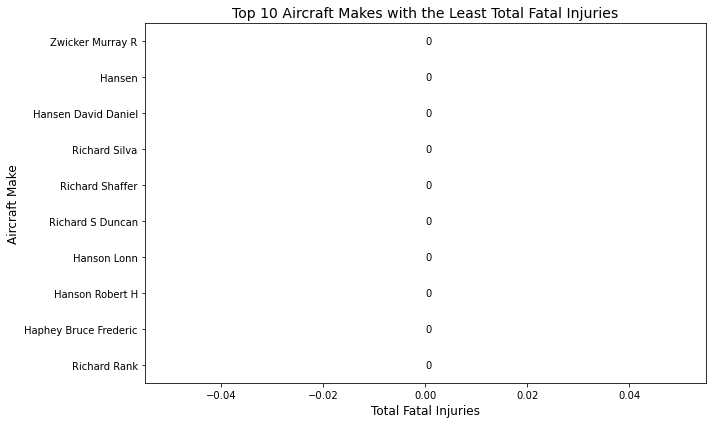

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Clean 'Make' column ---
aviation_data['Make'] = aviation_data['Make'].fillna('').str.strip().str.title()

# Remove empty Make values
aviation_data = aviation_data[aviation_data['Make'] != '']

# --- Group and sum total fatal injuries ---
fatal_by_make = aviation_data.groupby('Make', as_index=False)['Total.Fatal.Injuries'].sum()

# --- Sort ascending (least fatalities first) and select top 10 ---
least_fatal_10 = fatal_by_make.sort_values(by='Total.Fatal.Injuries', ascending=True).head(10)

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=least_fatal_10,
    y='Make',
    x='Total.Fatal.Injuries',
    palette='Greens'   # green = safer / fewer fatalities
)

plt.title('Top 10 Aircraft Makes with the Least Total Fatal Injuries', fontsize=14)
plt.xlabel('Total Fatal Injuries', fontsize=12)
plt.ylabel('Aircraft Make', fontsize=12)

# Add value labels
for index, value in enumerate(least_fatal_10['Total.Fatal.Injuries']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()



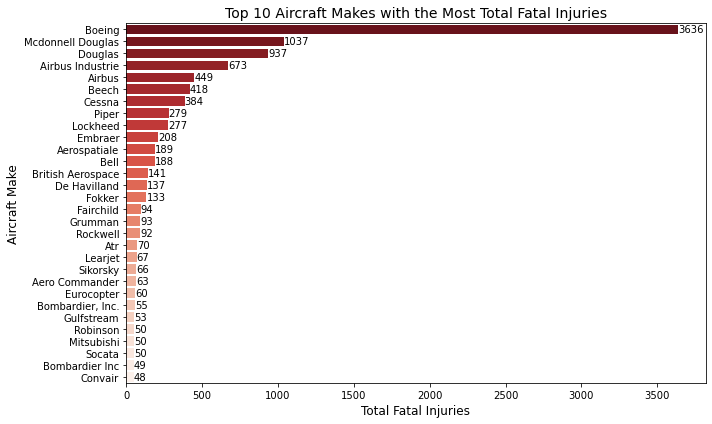

In [29]:
# Makes with the highest Total Fatal Injuries

# --- Clean 'Make' column ---
aviation_data['Make'] = aviation_data['Make'].fillna('').str.strip().str.title()

# --- Group and sum total fatal injuries ---
fatal_by_make = aviation_data.groupby('Make', as_index=False)['Total.Fatal.Injuries'].sum()

# --- Sort descending (most fatalities first) and select top 10 ---
most_fatal_10 = fatal_by_make.sort_values(by='Total.Fatal.Injuries', ascending=False).head(30)

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=most_fatal_10,
    y='Make',
    x='Total.Fatal.Injuries',
    palette='Reds_r'  # darker = more fatalities
)
plt.title('Top 10 Aircraft Makes with the Most Total Fatal Injuries', fontsize=14)
plt.xlabel('Total Fatal Injuries', fontsize=12)
plt.ylabel('Aircraft Make', fontsize=12)

# Add value labels to bars
for index, value in enumerate(most_fatal_10['Total.Fatal.Injuries']):
    plt.text(value, index, f'{int(value)}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

From our results, the planes we surely would want to avoid due to safety are Boeing, Mc Douglas, Airbus, Beech, Cessna e.t.c (as shown above)

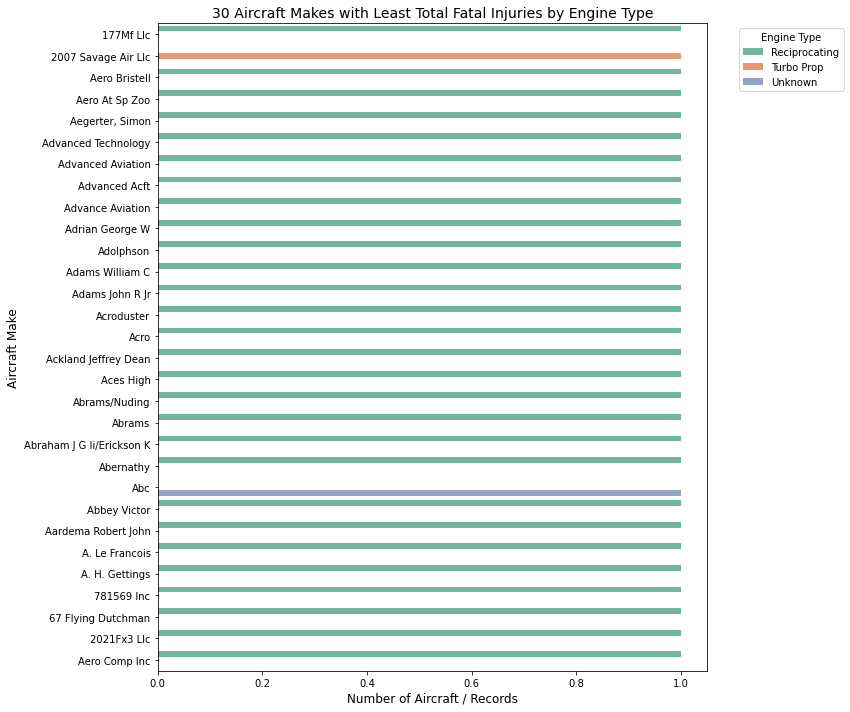

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Clean text columns ---
aviation_data['Make'] = aviation_data['Make'].fillna('').str.strip().str.title()
aviation_data['Engine.Type'] = aviation_data['Engine.Type'].fillna('').str.strip().str.title()

# Remove empty Make values
aviation_data = aviation_data[aviation_data['Make'] != '']

# --- Aggregate total fatal injuries by Make ---
fatal_by_make = (
    aviation_data.groupby('Make', as_index=False)['Total.Fatal.Injuries'].sum()
)

# --- Select 30 makes with the least total fatal injuries ---
least_fatal_30 = fatal_by_make.nsmallest(30, 'Total.Fatal.Injuries')['Make']

# --- Filter original data for these 30 makes ---
filtered_data = aviation_data[aviation_data['Make'].isin(least_fatal_30)]

# Remove empty engine types
filtered_data = filtered_data[filtered_data['Engine.Type'] != '']

# --- Group by Make and Engine.Type for plotting ---
make_engine_counts = (
    filtered_data.groupby(['Make', 'Engine.Type'])
    .size()
    .reset_index(name='Count')
)

# Sort for cleaner plotting
make_engine_counts = make_engine_counts.sort_values(by='Count', ascending=False)

# --- Plot ---
plt.figure(figsize=(12, 10))
sns.barplot(
    data=make_engine_counts,
    x='Count',
    y='Make',
    hue='Engine.Type',
    palette='Set2'
)

plt.title('30 Aircraft Makes with Least Total Fatal Injuries by Engine Type', fontsize=14)
plt.xlabel('Number of Aircraft / Records', fontsize=12)
plt.ylabel('Aircraft Make', fontsize=12)
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Reciprocating engines are good for long distance.

Turboprop are good for short distance.

Turbojet are good for medium distance

## 6.5 Results and Recommendations

Based on our results above, we would suggest that our company procures the 2007 Savage Air Lc for short distance flights and the other several suggested makes (as per chart) for long distance flights.